In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
data = pd.read_csv('housing.csv')

In [163]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [164]:
#used to see if we have any NAN values to drop them
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [165]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [166]:
# Removes any rows with missing (NaN) values from the dataset and updates the DataFrame in place
data.dropna(inplace=True)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [168]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)# Features: all columns except 'median_house_value'
y = data['median_house_value'] # Target variable: 'median_house_value'



In [169]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [170]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [171]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [172]:
trainedData = X_train.join(Y_train)

In [173]:
trainedData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8547,-118.35,33.88,36.0,1583.0,411.0,1097.0,350.0,4.0737,<1H OCEAN,238200.0
7520,-118.26,33.91,33.0,954.0,241.0,655.0,218.0,2.5882,<1H OCEAN,92800.0
11009,-117.76,33.79,4.0,8974.0,1268.0,3754.0,1241.0,8.2653,<1H OCEAN,374000.0
703,-122.04,37.63,21.0,1307.0,236.0,586.0,249.0,4.7813,NEAR BAY,241900.0
17399,-120.47,34.94,17.0,1368.0,308.0,642.0,303.0,1.8633,<1H OCEAN,109400.0
...,...,...,...,...,...,...,...,...,...,...
17168,-122.27,37.45,41.0,830.0,136.0,353.0,153.0,6.3824,NEAR OCEAN,500001.0
14796,-117.10,32.58,27.0,2616.0,591.0,1889.0,577.0,2.3824,NEAR OCEAN,127600.0
6249,-117.98,34.05,33.0,1560.0,315.0,1467.0,313.0,4.1429,<1H OCEAN,159800.0
13514,-117.34,34.12,26.0,1008.0,164.0,568.0,196.0,3.3516,INLAND,105600.0


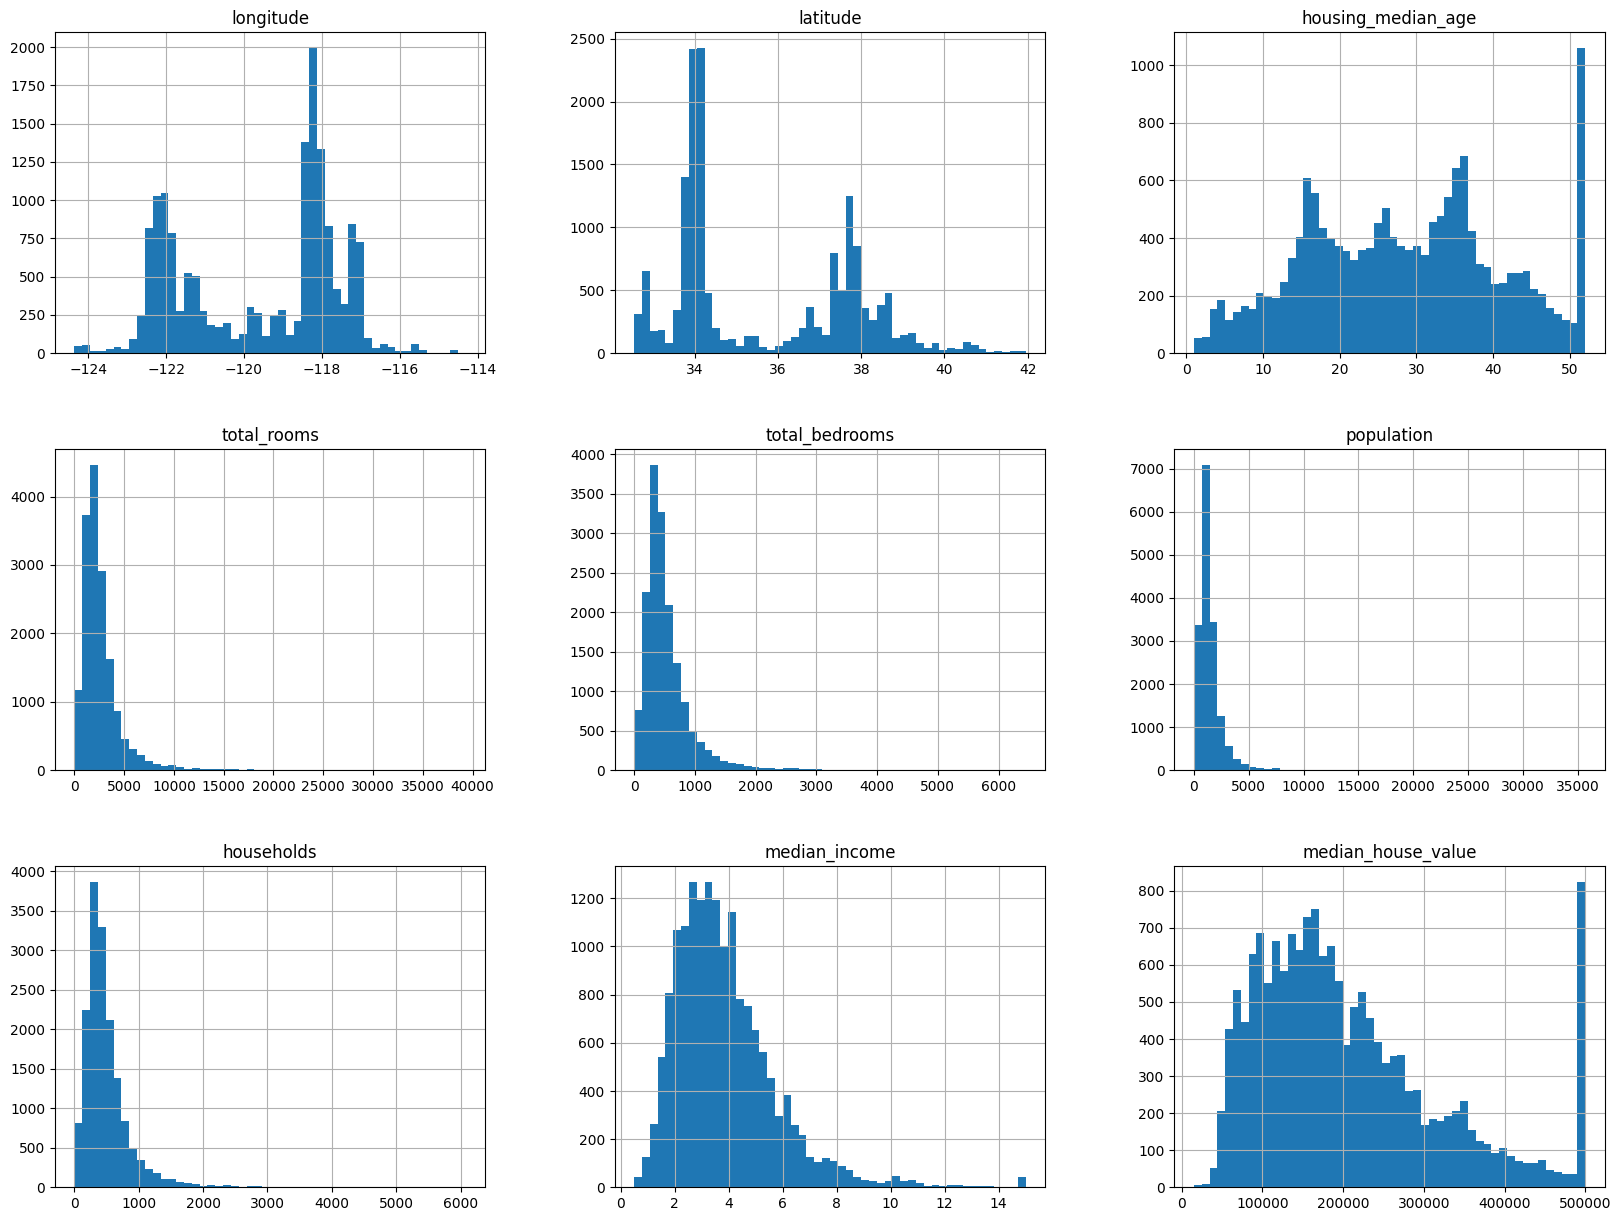

In [174]:
trainedData.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

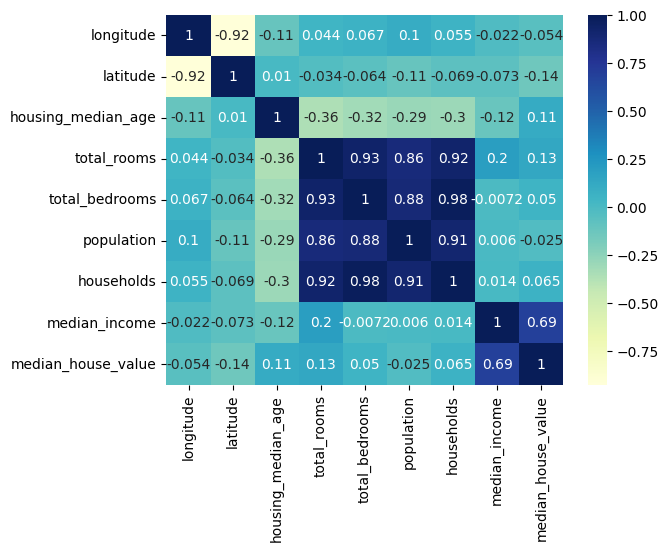

In [175]:
trainedData_numeric = trainedData.drop('ocean_proximity', axis=1).copy()
sns.heatmap(trainedData_numeric.corr(),annot=True,cmap="YlGnBu")


In [176]:
trainedData['total_rooms'] =np.log(trainedData['total_rooms']+1)
trainedData['households'] = np.log(trainedData['households']+1)
trainedData['total_bedrooms'] = np.log(trainedData['total_bedrooms']+1)
trainedData['population'] = np.log(trainedData['population']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

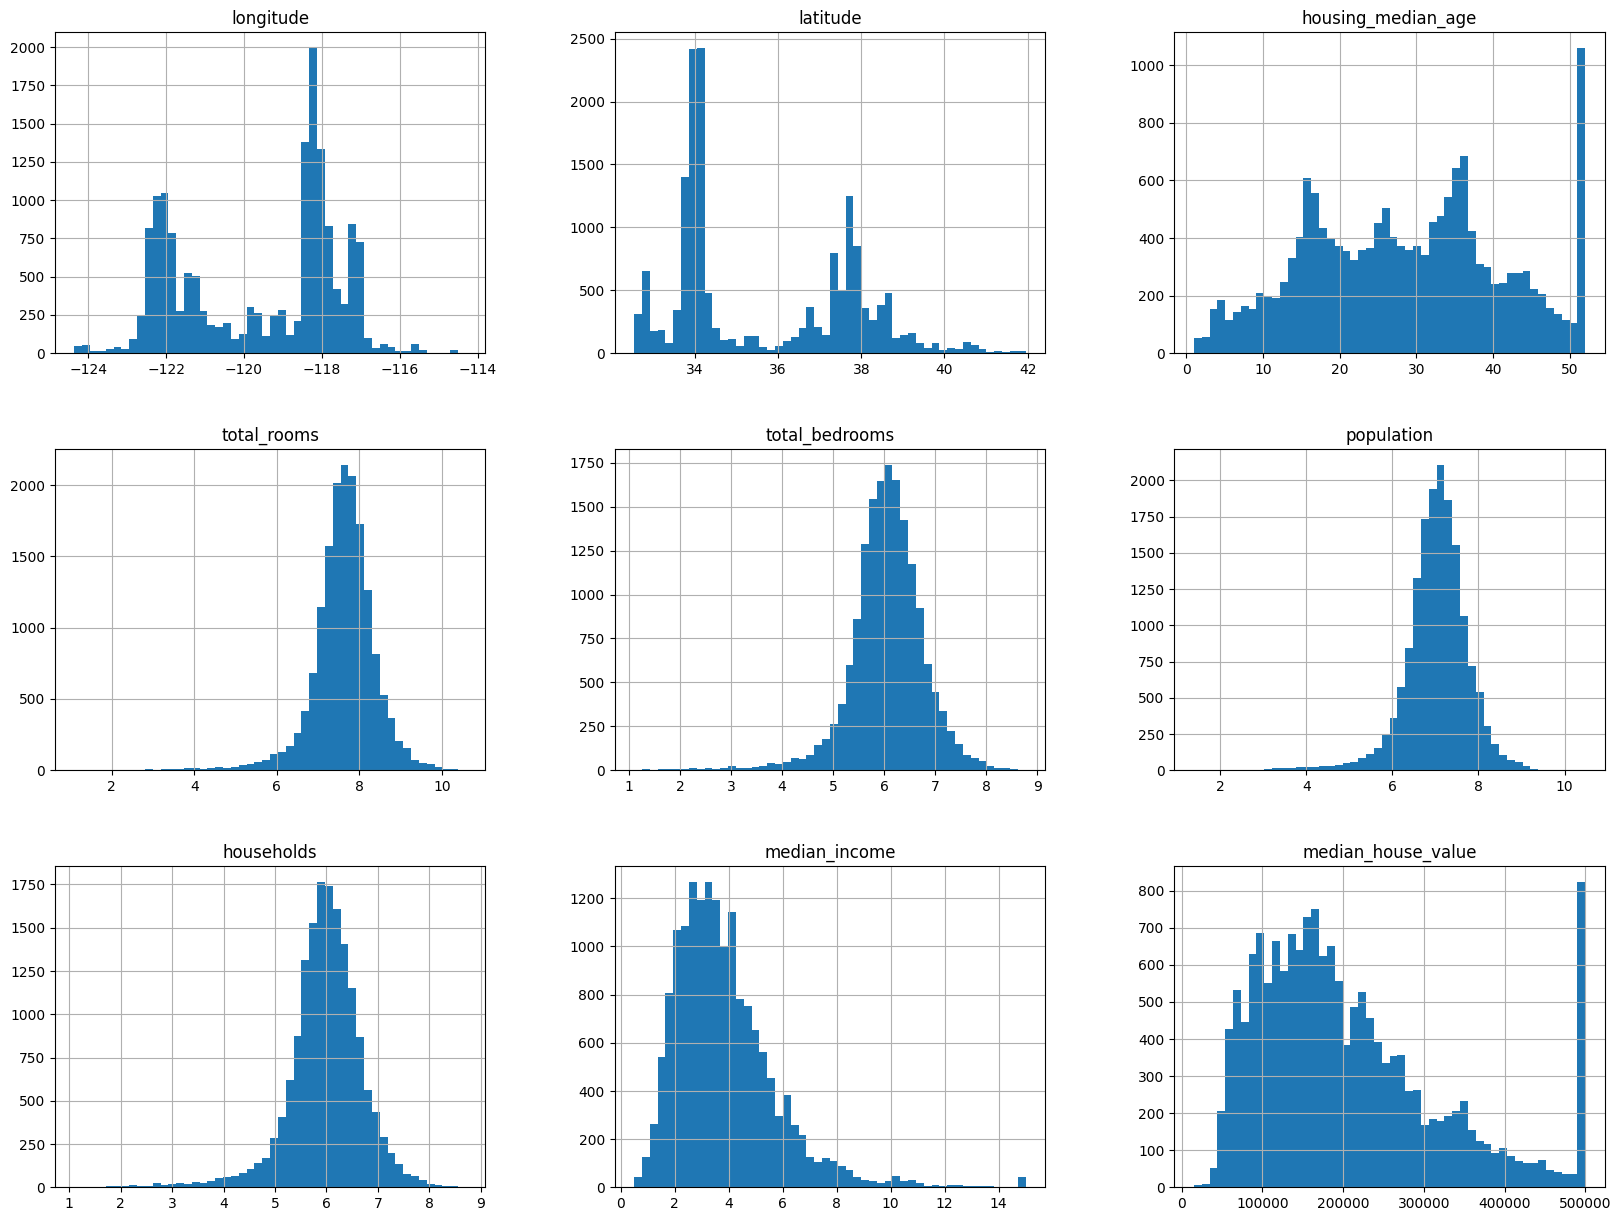

In [177]:
trainedData.hist(bins=50,figsize=(20,15))


In [178]:
trainedData = trainedData.join(pd.get_dummies(trainedData.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [179]:
trainedData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8547,-118.35,33.88,36.0,7.367709,6.021023,7.001246,5.860786,4.0737,238200.0,True,False,False,False,False
7520,-118.26,33.91,33.0,6.861711,5.488938,6.486161,5.389072,2.5882,92800.0,True,False,False,False,False
11009,-117.76,33.79,4.0,9.102198,7.145984,8.230844,7.124478,8.2653,374000.0,True,False,False,False,False
703,-122.04,37.63,21.0,7.176255,5.468060,6.375025,5.521461,4.7813,241900.0,False,False,False,True,False
17399,-120.47,34.94,17.0,7.221836,5.733341,6.466145,5.717028,1.8633,109400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17168,-122.27,37.45,41.0,6.722630,4.919981,5.869297,5.036953,6.3824,500001.0,False,False,False,False,True
14796,-117.10,32.58,27.0,7.869784,6.383507,7.544332,6.359574,2.3824,127600.0,False,False,False,False,True
6249,-117.98,34.05,33.0,7.353082,5.755742,7.291656,5.749393,4.1429,159800.0,True,False,False,False,False
13514,-117.34,34.12,26.0,6.916715,5.105945,6.343880,5.283204,3.3516,105600.0,False,True,False,False,False


<Axes: >

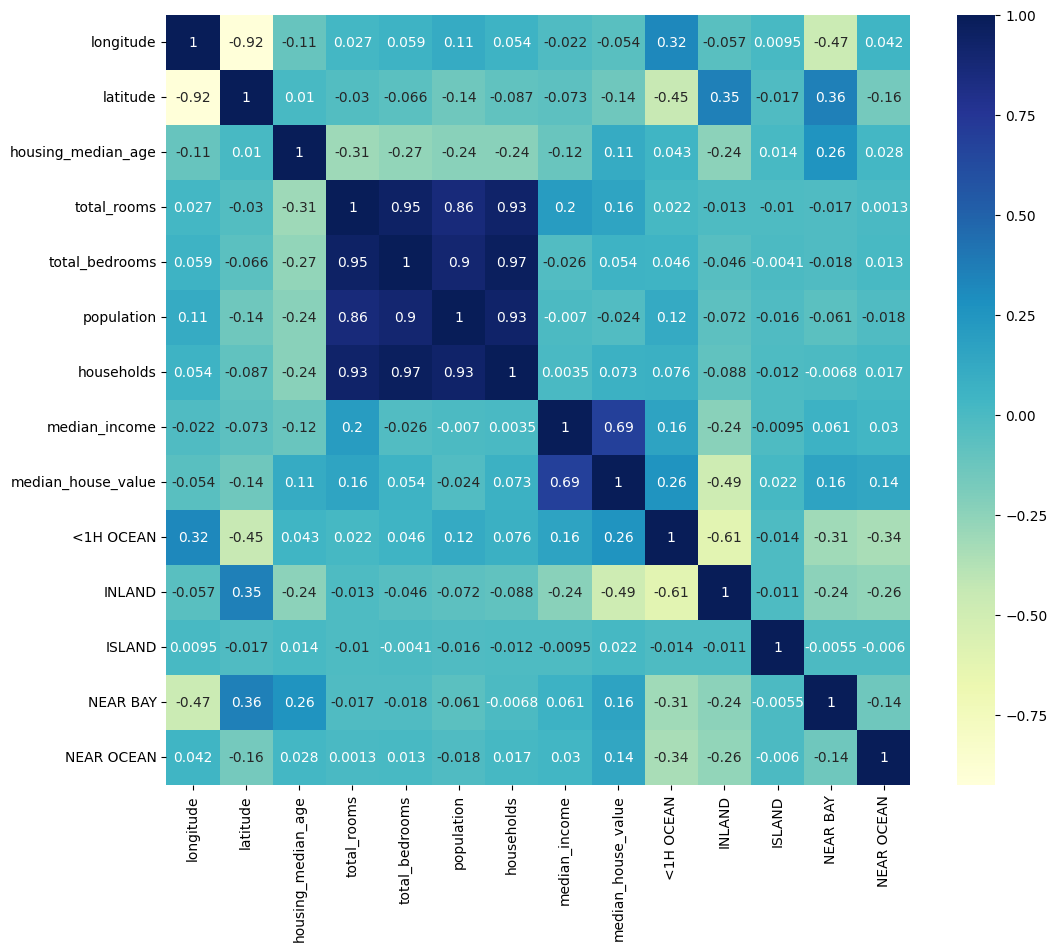

In [180]:
plt.figure(figsize=(12,10))
sns.heatmap(trainedData.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='longitude', ylabel='latitude'>

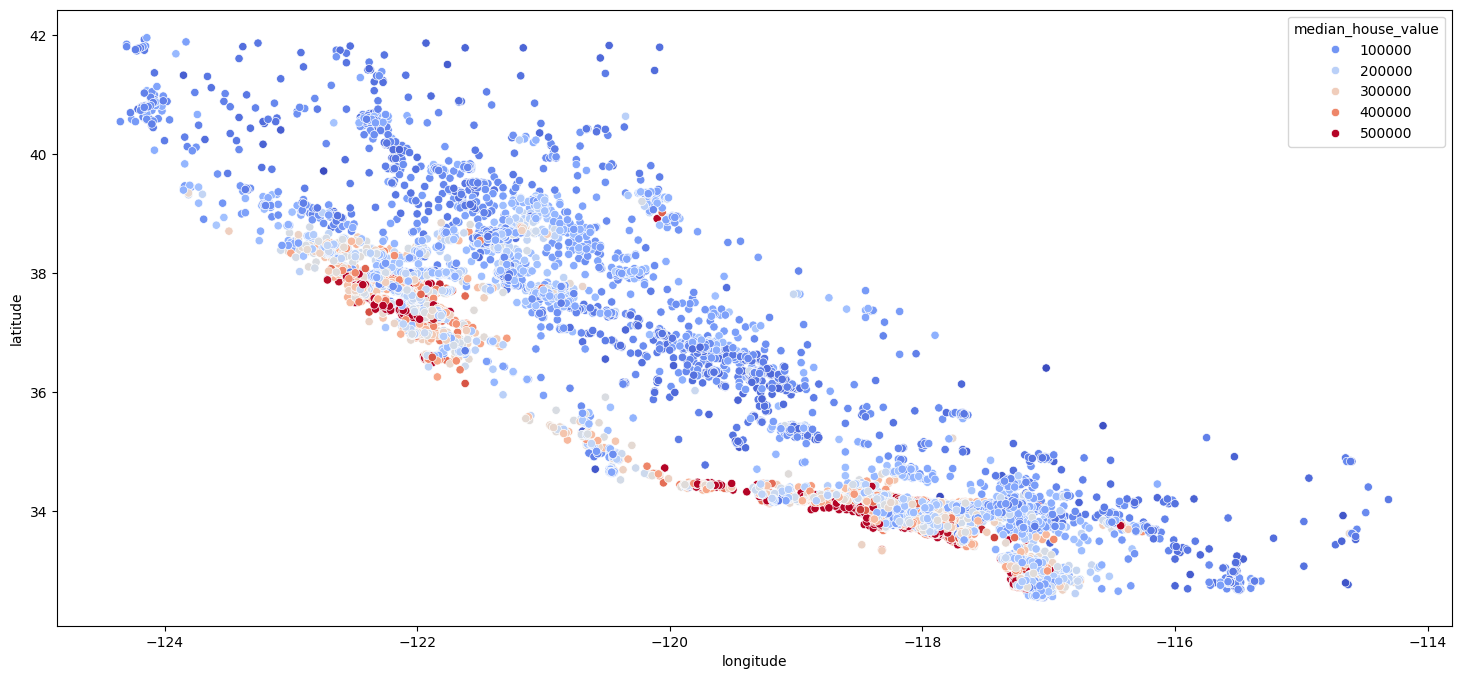

In [181]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='longitude',y='latitude',data=trainedData,hue='median_house_value',palette='coolwarm')


In [182]:
trainedData['total_ratio'] = trainedData['total_bedrooms'] / trainedData['total_rooms']
trainedData['households_rooms'] = trainedData['total_rooms'] / trainedData['households']

<Axes: >

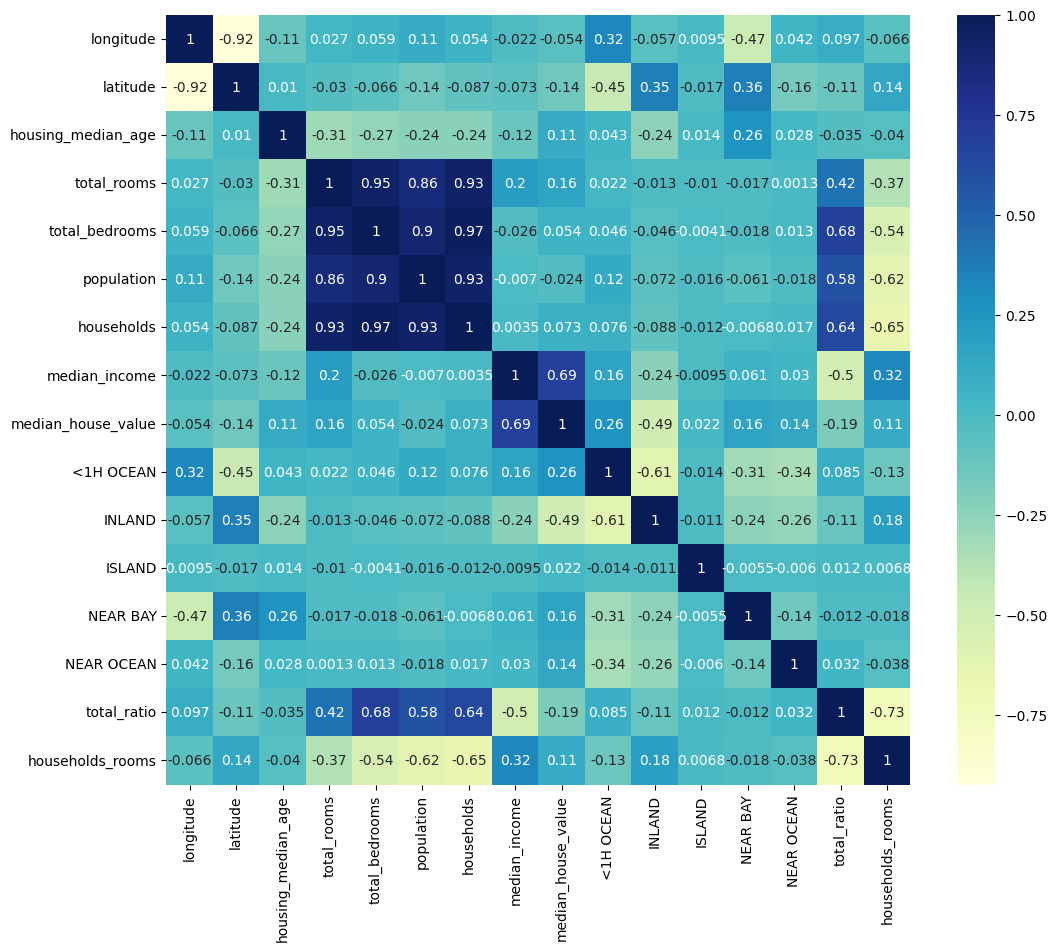

In [183]:
plt.figure(figsize=(12,10))
sns.heatmap(trainedData.corr(),annot=True,cmap="YlGnBu")

In [184]:
from sklearn.linear_model import LinearRegression

# Separate features (X_train) and target (Y_train):
X_train, Y_train = trainedData.drop(['median_house_value'], axis=1), trainedData['median_house_value']

reg = LinearRegression()


reg.fit(X_train, Y_train)
# Train the model on X_train and Y_train:
#   - The fit() method finds the best-fit coefficients (weights) and intercept
#   - It minimizes the residual sum of squares between observed targets and predictions :contentReference[oaicite:2]{index=2}


LinearRegression()

In [185]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] =np.log(test_data['total_rooms']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['total_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

X_test,Y_test = test_data.drop(['median_house_value'],axis=1),trainedData['median_house_value']

In [194]:
X_test,Y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [195]:
reg.score(X_test,Y_test)

0.6690639781201224

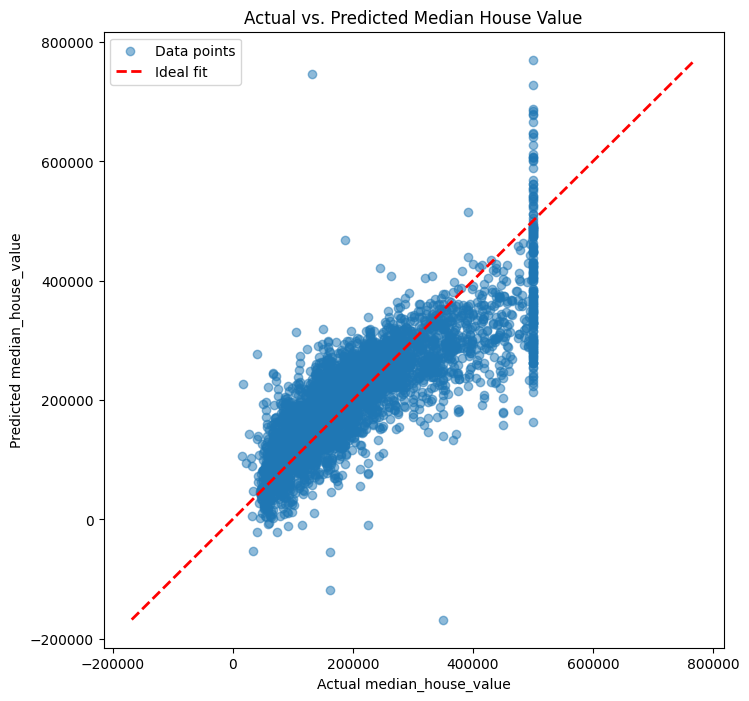

In [199]:

y_pred = reg.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(Y_test, y_pred, alpha=0.5, label='Data points')


min_val = min(Y_test.min(), y_pred.min())
max_val = max(Y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal fit')

plt.xlabel('Actual median_house_value')
plt.ylabel('Predicted median_house_value')
plt.title('Actual vs. Predicted Median House Value')
plt.legend()
plt.show()
